In [17]:
%matplotlib notebook

In [18]:
import pandas as pd
import numpy as np
from shapely import geometry
from shapely.ops import cascaded_union
import matplotlib
from matplotlib import pyplot as plt


In [19]:
def getTissuePositions(inputName, ouputName, gridSize,dx,dy):
    
    NoOfTissues = 1
    NoOfTissuesBottom = 0
    
    #--------------------------------------------------
    # generate grids
    #--------------------------------------------------
    grid = []
    for x in range(-gridSize, gridSize+1):
      for y in range(-gridSize, gridSize+1):
        if x % 2 == 0:
            grid.append((x*200, y*200))
        else:
            grid.append((x*200, -y*200))

    grid_R =  grid[::-1]
    grid = np.array(grid)
    grid_R = np.array(grid_R)
    
    #---------------------------------------------------
    # Read input positions
    #---------------------------------------------------
    points = pd.read_csv(inputName, header = None, sep=',')
    print(inputName+ ' read!')
    print(str(points.shape[0]) + ' points found.')
    
    #---------------------------------------------------
    # Read input positions
    #---------------------------------------------------
    
    n = points.shape[0] #number of positions you selected for each slice to define the region of interest

    positions = np.empty((0,2))
    for i in range(0,NoOfTissuesBottom):
        tissue = geometry.Polygon(points.values[n*i:n*(i+1)])
        center = np.mean(points.values[n*i:n*(i+1)], axis = 0)
        grids = grid_R + center
        saved = np.empty((0,2))
        for j in range(0,len(grids)):
            area = [[grids[j][0]-100,grids[j][1]-100],[grids[j][0]-100,grids[j][1]+100],[grids[j][0]+100,grids[j][1]+100],[grids[j][0]+100,grids[j][1]-100]]
            tile = geometry.Polygon([[p[0], p[1]] for p in area])
            if tissue.intersects(tile) == True:
                saved = np.concatenate((saved,np.array([grids[j]])), axis = 0)
        positions = np.concatenate((positions,saved))

    for i in range(NoOfTissuesBottom,NoOfTissues):
        tissue = geometry.Polygon(points.values[n*i:n*(i+1)])
        center = np.mean(points.values[n*i:n*(i+1)], axis = 0)
        grids = grid + center
        saved = np.empty((0,2))
        for j in range(0,len(grids)):
            area = [[grids[j][0]-100,grids[j][1]-100],[grids[j][0]-100,grids[j][1]+100],[grids[j][0]+100,grids[j][1]+100],[grids[j][0]+100,grids[j][1]-100]]
            tile = geometry.Polygon([[p[0], p[1]] for p in area])
            if tissue.intersects(tile) == True:
                saved = np.concatenate((saved,np.array([grids[j]])), axis = 0)
        positions = np.concatenate((positions,saved))
        
    # add displacement between 10x and 60x objectives
    positions = positions + [dX,dY]
        
    #---------------------------------------------------
    # save data
    #---------------------------------------------------
    np.savetxt(outputName, positions, delimiter=',')
    print(outputName+ ' saved!')
    print(str(positions.shape[0]) + ' positions generated.\n')
    
    return positions
    

### Shared variables

In [23]:
gridSize = 50
expDate = '210713'
expName = 'BC118'
imagingSettingsFolder = f'c:/Software/imaging-settings/{expDate}_{expName}/'

# Displacement of 60X objective respect to 10X


In [24]:
# center of dot 10x 
x_10x = 4267.8 
y_10x = -153.3

# center of dot 60x
x_60x = 3989.0
y_60x = -151.8

# in micrometers
dX = x_60x - x_10x
dY = y_60x - y_10x

print(f'dX = {dX}\ndY = {dY}')

dX = -278.8000000000002
dY = 1.5


### sample 01

In [25]:
sample = 1

# create grid for each section
inputName = f'{imagingSettingsFolder}sample_0{sample}/boundary_positions_01.txt'
outputName = f'{imagingSettingsFolder}sample_0{sample}/positions_{expName}_sample_0{sample}.txt'
positions = getTissuePositions(inputName,outputName,gridSize,dX,dY)

c:/Software/imaging-settings/210713_BC118/sample_01/boundary_positions_01.txt read!
122 points found.
c:/Software/imaging-settings/210713_BC118/sample_01/positions_BC118_sample_01.txt saved!
439 positions generated.



<IPython.core.display.Javascript object>


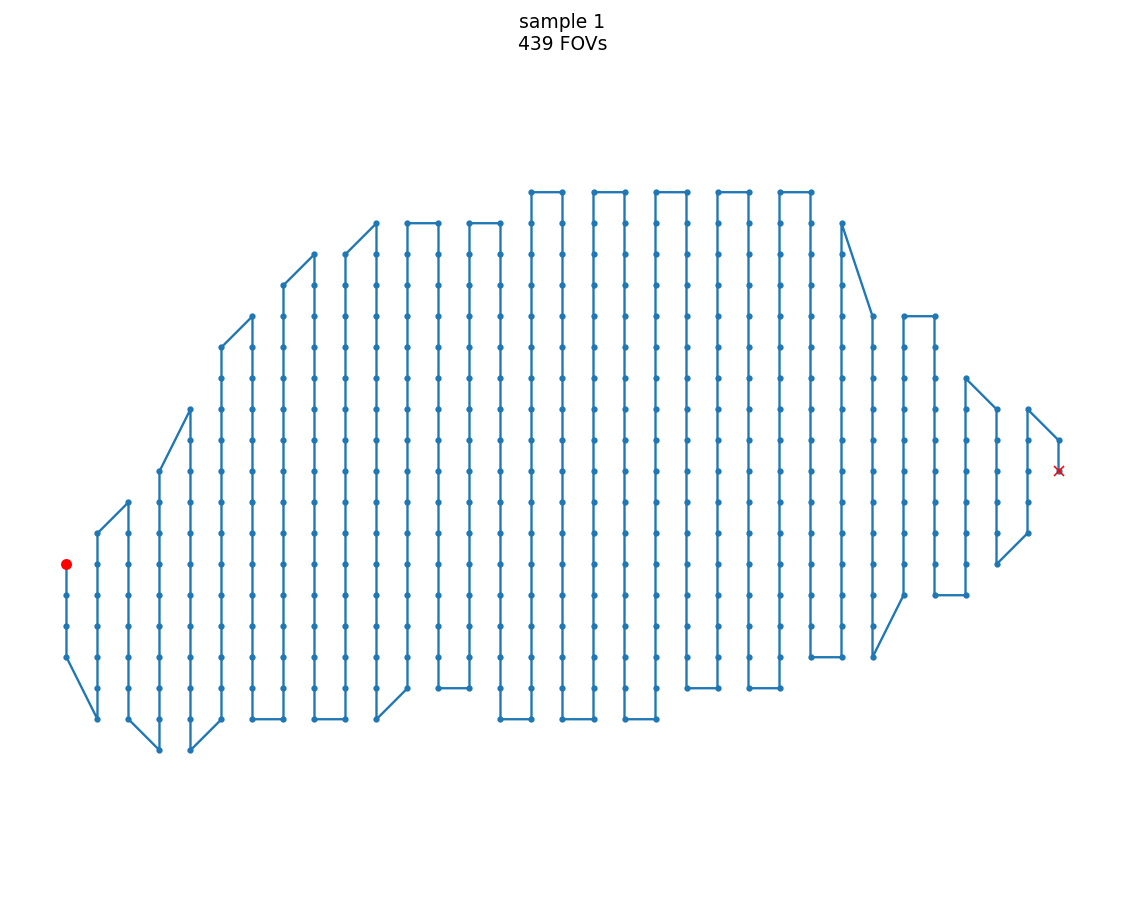

In [28]:
## Display positions
                              
fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(10,8))    
        
# load positions file
positions = pd.read_csv(outputName, header=None, names=('X','Y'))
    
# plot positions
ax.plot(positions.X,positions.Y,'.-')
ax.plot(positions.X.iloc[0],positions.Y.iloc[0],'ro')
ax.plot(positions.X.iloc[-1],positions.Y.iloc[-1],'rx')
#for i in range(positions.shape[0]):
#    ax.text(positions.X[i],positions.Y[i],str(i),fontsize=6)
    
ax.set_title('sample ' + str(sample) + '\n' + str(positions.shape[0]) + ' FOVs')
ax.axis('equal')
    
ax.axis('off')
fig.tight_layout()    

I will remove the first 12 positions

# sample 02

In [29]:
sample = 2

# create grid for each section
inputName = f'{imagingSettingsFolder}sample_0{sample}/boundary_positions_02.txt'
outputName = f'{imagingSettingsFolder}sample_0{sample}/positions_{expName}_sample_0{sample}.txt'
positions = getTissuePositions(inputName,outputName,gridSize,dX,dY)

c:/Software/imaging-settings/210713_BC118/sample_02/boundary_positions_02.txt read!
114 points found.
c:/Software/imaging-settings/210713_BC118/sample_02/positions_BC118_sample_02.txt saved!
457 positions generated.



<IPython.core.display.Javascript object>


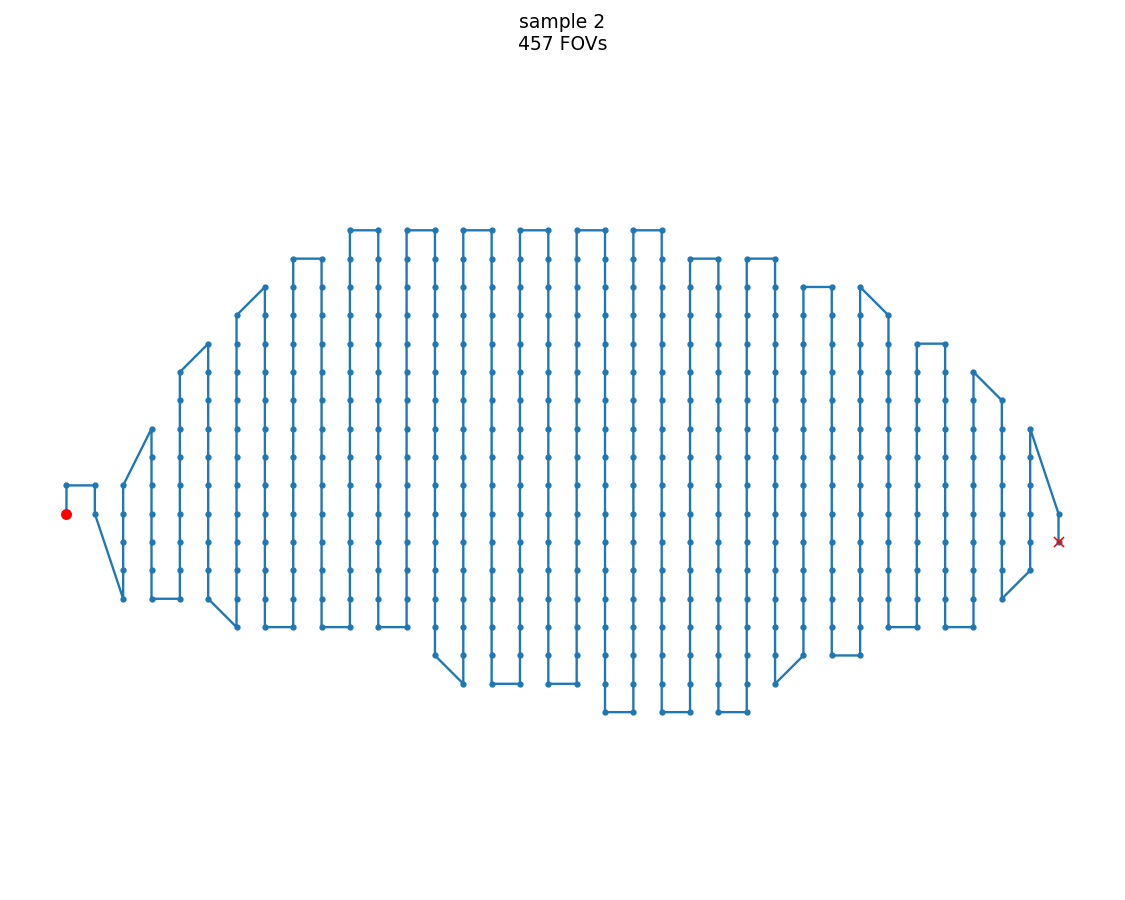

In [30]:
## Display positions
                              
fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(10,8))    
        
# load positions file
positions = pd.read_csv(outputName, header=None, names=('X','Y'))
    
# plot positions
ax.plot(positions.X,positions.Y,'.-')
ax.plot(positions.X.iloc[0],positions.Y.iloc[0],'ro')
ax.plot(positions.X.iloc[-1],positions.Y.iloc[-1],'rx')
#for i in range(positions.shape[0]):
#    ax.text(positions.X[i],positions.Y[i],str(i),fontsize=6)
    
ax.set_title('sample ' + str(sample) + '\n' + str(positions.shape[0]) + ' FOVs')
ax.axis('equal')
    
ax.axis('off')
fig.tight_layout()    

# sample 03

In [31]:
sample = 3

# create grid for each section
inputName = f'{imagingSettingsFolder}sample_0{sample}/boundary_positions_0{sample}.txt'
outputName = f'{imagingSettingsFolder}sample_0{sample}/positions_{expName}_sample_0{sample}.txt'
positions = getTissuePositions(inputName,outputName,gridSize,dX,dY)

c:/Software/imaging-settings/210713_BC118/sample_03/boundary_positions_03.txt read!
127 points found.
c:/Software/imaging-settings/210713_BC118/sample_03/positions_BC118_sample_03.txt saved!
430 positions generated.



<IPython.core.display.Javascript object>


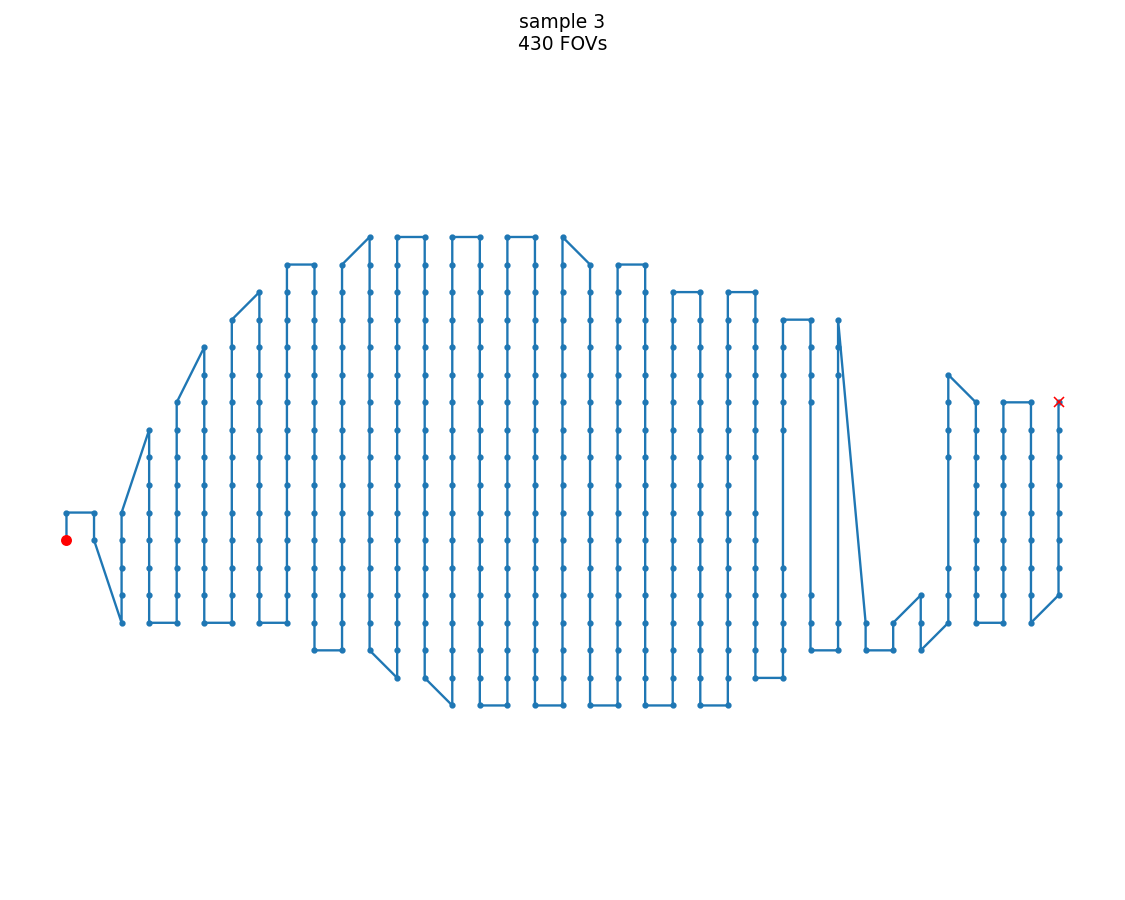

In [32]:
## Display positions
                              
fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(10,8))    
        
# load positions file
positions = pd.read_csv(outputName, header=None, names=('X','Y'))
    
# plot positions
ax.plot(positions.X,positions.Y,'.-')
ax.plot(positions.X.iloc[0],positions.Y.iloc[0],'ro')
ax.plot(positions.X.iloc[-1],positions.Y.iloc[-1],'rx')
#for i in range(positions.shape[0]):
#    ax.text(positions.X[i],positions.Y[i],str(i),fontsize=6)
    
ax.set_title('sample ' + str(sample) + '\n' + str(positions.shape[0]) + ' FOVs')
ax.axis('equal')
    
ax.axis('off')
fig.tight_layout()    

# sample 04

In [34]:
sample = 4

# create grid for each section
inputName = f'{imagingSettingsFolder}sample_0{sample}/boundary_positions_0{sample}.txt'
outputName = f'{imagingSettingsFolder}sample_0{sample}/positions_{expName}_sample_0{sample}.txt'
positions = getTissuePositions(inputName,outputName,gridSize,dX,dY)

c:/Software/imaging-settings/210713_BC118/sample_04/boundary_positions_04.txt read!
95 points found.
c:/Software/imaging-settings/210713_BC118/sample_04/positions_BC118_sample_04.txt saved!
456 positions generated.



<IPython.core.display.Javascript object>


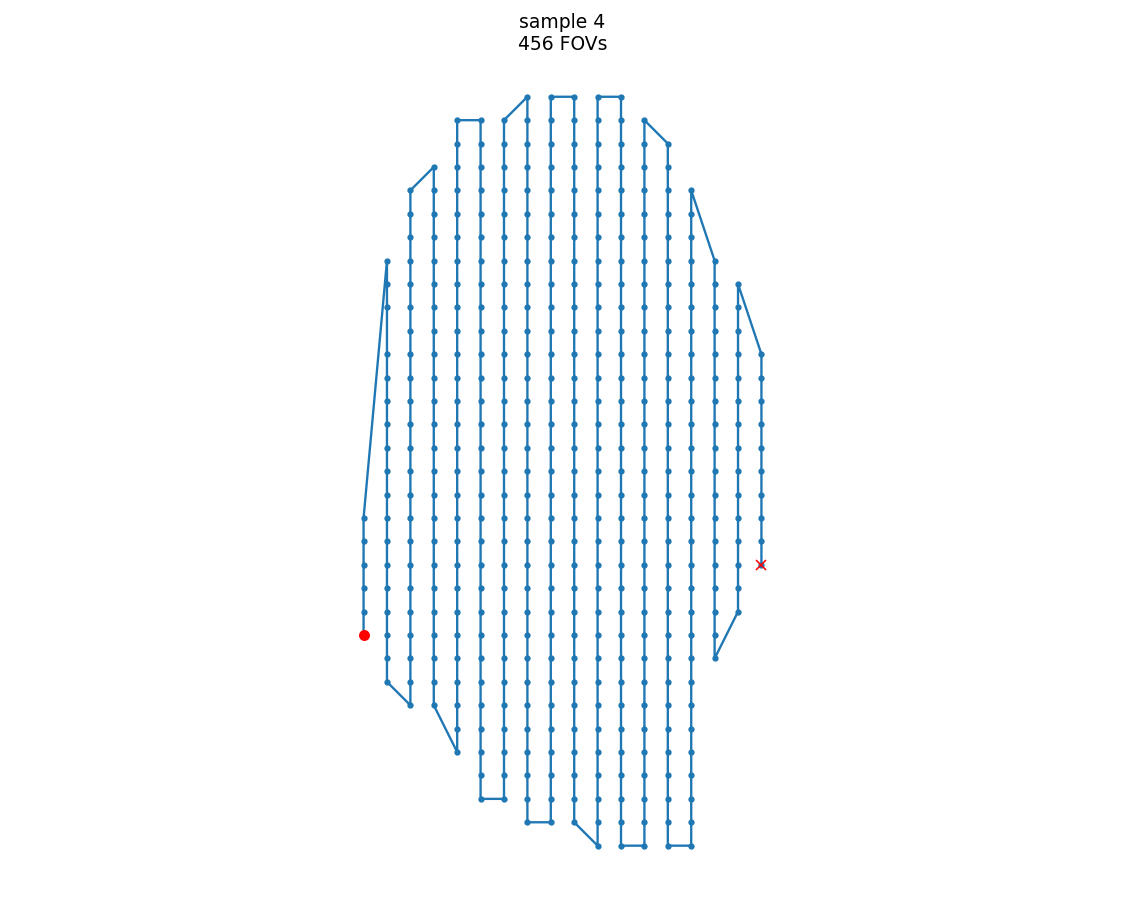

In [35]:
## Display positions
                              
fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(10,8))    
        
# load positions file
positions = pd.read_csv(outputName, header=None, names=('X','Y'))
    
# plot positions
ax.plot(positions.X,positions.Y,'.-')
ax.plot(positions.X.iloc[0],positions.Y.iloc[0],'ro')
ax.plot(positions.X.iloc[-1],positions.Y.iloc[-1],'rx')
#for i in range(positions.shape[0]):
#    ax.text(positions.X[i],positions.Y[i],str(i),fontsize=6)
    
ax.set_title('sample ' + str(sample) + '\n' + str(positions.shape[0]) + ' FOVs')
ax.axis('equal')
    
ax.axis('off')
fig.tight_layout()    